In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import sys
from decimal import Decimal
from random import seed
from random import random

# I
Generate an n-dimensional random vector 𝒗 = [𝑣 % , 𝑣 ' , … , 𝑣 ) ] with non-negative
elements. For 𝒗, implement the following calculations and algorithms:

In [2]:
seed(42)

# Function for generating a vector of lengh n

def get_vector(n):
    return np.array([Decimal(random()) for i in range(n)])

v = get_vector(5)
v, type(v[0])

(array([Decimal('0.63942679845788374937143316856236197054386138916015625'),
        Decimal('0.02501075522266693607065235482878051698207855224609375'),
        Decimal('0.2750293183691192577811079900129698216915130615234375'),
        Decimal('0.22321073814882275154758417556877247989177703857421875'),
        Decimal('0.7364712141640123999053457737318240106105804443359375')],
       dtype=object),
 decimal.Decimal)

## 1)

Constant function

In [3]:
def constant_function(v, *args):
    return 42

constant_function(v, 6)

42

## 2)

The sum of elements

In [4]:
def sum_of_elements(v, *args):
    return v.sum()

sum_of_elements(v)

Decimal('1.899148824362505094676123463')

## 3)

The product of elements

In [5]:
def prod_of_elements(v, *args):
    return v.prod()

prod_of_elements(v)

Decimal('0.0007230486044832286476559885481')

## 4)

supposing that the elements of 𝒗 are the coefficients of a polynomial 𝑃 of degree 𝑛 − 1, calculate the value 𝑃(1.5)

In [6]:
# generating x**n
def x_generator(x, n):
    for i in range(n-1, -1, -1):
        yield Decimal(x)**Decimal(i)

# direct method
def polynomial_direct(v, x, *args):
    X = [a for a in x_generator(x, v.shape[0])]
    return sum([X[i]*v[i] for i in range(v.shape[0])])

# Horner's method
def polynomial_Horner(v, x, i=0, *args):
    if i==v.shape[0]-1:
        return v[0]
    else:
        return v[v.shape[0]-1-i]+x*polynomial_Horner(v, x, i+1)
    
    
polynomial_direct(v, 2), polynomial_Horner(v, 2)

(Decimal('12.71392478104561041263309562'),
 Decimal('12.71392478104561041263309562'))

## 5)

Bubble Sort of the elements of 𝒗

In [7]:
def bubble_sort(v, *args):
    arr = v.copy()
    n = v.shape[0]
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                
    return arr

v1 = bubble_sort(v)
v1

array([Decimal('0.02501075522266693607065235482878051698207855224609375'),
       Decimal('0.22321073814882275154758417556877247989177703857421875'),
       Decimal('0.2750293183691192577811079900129698216915130615234375'),
       Decimal('0.63942679845788374937143316856236197054386138916015625'),
       Decimal('0.7364712141640123999053457737318240106105804443359375')],
      dtype=object)

## 6)

Quick Sort of the elements of 𝒗

In [8]:
def quick_sort(v, *args):
    arr = v.copy()
    arr.sort(kind='quicksort')
    return arr
quick_sort(v)

array([Decimal('0.02501075522266693607065235482878051698207855224609375'),
       Decimal('0.22321073814882275154758417556877247989177703857421875'),
       Decimal('0.2750293183691192577811079900129698216915130615234375'),
       Decimal('0.63942679845788374937143316856236197054386138916015625'),
       Decimal('0.7364712141640123999053457737318240106105804443359375')],
      dtype=object)

## 7)

Timsort of the elements of 𝒗. According to numpy [documentation](https://numpy.org/doc/stable/reference/generated/numpy.sort.html)  np.sort with `kind='stable'` uses timsort.

In [9]:
def timsort(v, *args):
    arr = v.copy()
    arr.sort(kind='stable')
    return arr
quick_sort(v)

array([Decimal('0.02501075522266693607065235482878051698207855224609375'),
       Decimal('0.22321073814882275154758417556877247989177703857421875'),
       Decimal('0.2750293183691192577811079900129698216915130615234375'),
       Decimal('0.63942679845788374937143316856236197054386138916015625'),
       Decimal('0.7364712141640123999053457737318240106105804443359375')],
      dtype=object)

Dictionary `results` will contain time spent for all runs for each operation

In [10]:
results = {}
results['constant_function'] = np.zeros((5, 2000))
results['sum_of_elements'] = np.zeros((5, 2000))
results['prod_of_elements'] = np.zeros((5, 2000))
results['polynomial_direct'] = np.zeros((5, 2000))
results['polynomial_Horner'] = np.zeros((5, 2000))
results['bubble_sort'] = np.zeros((5, 2000))
results['quick_sort'] = np.zeros((5, 2000))
results['timsort'] = np.zeros((5, 2000))
results['matrices'] = np.zeros((5, 2000))

Dictionary `functions` will be used in the main loop with all runs for convenience 

In [11]:
functions = {}
functions['constant_function'] =constant_function
functions['sum_of_elements'] =sum_of_elements
functions['prod_of_elements'] =prod_of_elements
functions['polynomial_direct'] =polynomial_direct
functions['polynomial_Horner'] =polynomial_Horner
functions['bubble_sort'] =bubble_sort
functions['quick_sort'] =quick_sort
functions['timsort'] =timsort

Main loop

In [12]:
# loop for five experiments, in the end they will be averaged
for experiment_number in range(5):
    # changing random seed for each experiment, so they will not be the same
    seed(time.time()*time.time())
    # loop for n = [1...2000]
    for n in range(1, 2001):
        # generating the vector
        v = get_vector(n)
        print("Run No {}. Starting an experiment with n={}".format(experiment_number, n))
        # loop for all operations except product of matrices
        # functions is a dictionary of realized operations
        for function in functions.keys():
            # timestamp of beginning
            start = time.time()
            # running of the function
            numerical_result = functions[function](v, Decimal(1.5))
            # writing working time into created structure
            results[function][experiment_number][n-1] = time.time()-start
        # calculating product of matrices
        A = np.random.random(size=(n, n))
        B = np.random.random(size=(n, n))
        start = time.time()
        C = np.dot(A, B)
        results['matrices'][experiment_number][n-1] = time.time() - start

Run No 0. Starting an experiment with n=1
Run No 0. Starting an experiment with n=2
Run No 0. Starting an experiment with n=3
Run No 0. Starting an experiment with n=4
Run No 0. Starting an experiment with n=5
Run No 0. Starting an experiment with n=6
Run No 0. Starting an experiment with n=7
Run No 0. Starting an experiment with n=8
Run No 0. Starting an experiment with n=9
Run No 0. Starting an experiment with n=10
Run No 0. Starting an experiment with n=11
Run No 0. Starting an experiment with n=12
Run No 0. Starting an experiment with n=13
Run No 0. Starting an experiment with n=14
Run No 0. Starting an experiment with n=15
Run No 0. Starting an experiment with n=16
Run No 0. Starting an experiment with n=17
Run No 0. Starting an experiment with n=18
Run No 0. Starting an experiment with n=19
Run No 0. Starting an experiment with n=20
Run No 0. Starting an experiment with n=21
Run No 0. Starting an experiment with n=22
Run No 0. Starting an experiment with n=23
Run No 0. Starting a

Run No 0. Starting an experiment with n=201
Run No 0. Starting an experiment with n=202
Run No 0. Starting an experiment with n=203
Run No 0. Starting an experiment with n=204
Run No 0. Starting an experiment with n=205
Run No 0. Starting an experiment with n=206
Run No 0. Starting an experiment with n=207
Run No 0. Starting an experiment with n=208
Run No 0. Starting an experiment with n=209
Run No 0. Starting an experiment with n=210
Run No 0. Starting an experiment with n=211
Run No 0. Starting an experiment with n=212
Run No 0. Starting an experiment with n=213
Run No 0. Starting an experiment with n=214
Run No 0. Starting an experiment with n=215
Run No 0. Starting an experiment with n=216
Run No 0. Starting an experiment with n=217
Run No 0. Starting an experiment with n=218
Run No 0. Starting an experiment with n=219
Run No 0. Starting an experiment with n=220
Run No 0. Starting an experiment with n=221
Run No 0. Starting an experiment with n=222
Run No 0. Starting an experiment

Run No 0. Starting an experiment with n=393
Run No 0. Starting an experiment with n=394
Run No 0. Starting an experiment with n=395
Run No 0. Starting an experiment with n=396
Run No 0. Starting an experiment with n=397
Run No 0. Starting an experiment with n=398
Run No 0. Starting an experiment with n=399
Run No 0. Starting an experiment with n=400
Run No 0. Starting an experiment with n=401
Run No 0. Starting an experiment with n=402
Run No 0. Starting an experiment with n=403
Run No 0. Starting an experiment with n=404
Run No 0. Starting an experiment with n=405
Run No 0. Starting an experiment with n=406
Run No 0. Starting an experiment with n=407
Run No 0. Starting an experiment with n=408
Run No 0. Starting an experiment with n=409
Run No 0. Starting an experiment with n=410
Run No 0. Starting an experiment with n=411
Run No 0. Starting an experiment with n=412
Run No 0. Starting an experiment with n=413
Run No 0. Starting an experiment with n=414
Run No 0. Starting an experiment

Run No 0. Starting an experiment with n=582
Run No 0. Starting an experiment with n=583
Run No 0. Starting an experiment with n=584
Run No 0. Starting an experiment with n=585
Run No 0. Starting an experiment with n=586
Run No 0. Starting an experiment with n=587
Run No 0. Starting an experiment with n=588
Run No 0. Starting an experiment with n=589
Run No 0. Starting an experiment with n=590
Run No 0. Starting an experiment with n=591
Run No 0. Starting an experiment with n=592
Run No 0. Starting an experiment with n=593
Run No 0. Starting an experiment with n=594
Run No 0. Starting an experiment with n=595
Run No 0. Starting an experiment with n=596
Run No 0. Starting an experiment with n=597
Run No 0. Starting an experiment with n=598
Run No 0. Starting an experiment with n=599
Run No 0. Starting an experiment with n=600
Run No 0. Starting an experiment with n=601
Run No 0. Starting an experiment with n=602
Run No 0. Starting an experiment with n=603
Run No 0. Starting an experiment

Run No 0. Starting an experiment with n=769
Run No 0. Starting an experiment with n=770
Run No 0. Starting an experiment with n=771
Run No 0. Starting an experiment with n=772
Run No 0. Starting an experiment with n=773
Run No 0. Starting an experiment with n=774
Run No 0. Starting an experiment with n=775
Run No 0. Starting an experiment with n=776
Run No 0. Starting an experiment with n=777
Run No 0. Starting an experiment with n=778
Run No 0. Starting an experiment with n=779
Run No 0. Starting an experiment with n=780
Run No 0. Starting an experiment with n=781
Run No 0. Starting an experiment with n=782
Run No 0. Starting an experiment with n=783
Run No 0. Starting an experiment with n=784
Run No 0. Starting an experiment with n=785
Run No 0. Starting an experiment with n=786
Run No 0. Starting an experiment with n=787
Run No 0. Starting an experiment with n=788
Run No 0. Starting an experiment with n=789
Run No 0. Starting an experiment with n=790
Run No 0. Starting an experiment

Run No 0. Starting an experiment with n=956
Run No 0. Starting an experiment with n=957
Run No 0. Starting an experiment with n=958
Run No 0. Starting an experiment with n=959
Run No 0. Starting an experiment with n=960
Run No 0. Starting an experiment with n=961
Run No 0. Starting an experiment with n=962
Run No 0. Starting an experiment with n=963
Run No 0. Starting an experiment with n=964
Run No 0. Starting an experiment with n=965
Run No 0. Starting an experiment with n=966
Run No 0. Starting an experiment with n=967
Run No 0. Starting an experiment with n=968
Run No 0. Starting an experiment with n=969
Run No 0. Starting an experiment with n=970
Run No 0. Starting an experiment with n=971
Run No 0. Starting an experiment with n=972
Run No 0. Starting an experiment with n=973
Run No 0. Starting an experiment with n=974
Run No 0. Starting an experiment with n=975
Run No 0. Starting an experiment with n=976
Run No 0. Starting an experiment with n=977
Run No 0. Starting an experiment

Run No 0. Starting an experiment with n=1140
Run No 0. Starting an experiment with n=1141
Run No 0. Starting an experiment with n=1142
Run No 0. Starting an experiment with n=1143
Run No 0. Starting an experiment with n=1144
Run No 0. Starting an experiment with n=1145
Run No 0. Starting an experiment with n=1146
Run No 0. Starting an experiment with n=1147
Run No 0. Starting an experiment with n=1148
Run No 0. Starting an experiment with n=1149
Run No 0. Starting an experiment with n=1150
Run No 0. Starting an experiment with n=1151
Run No 0. Starting an experiment with n=1152
Run No 0. Starting an experiment with n=1153
Run No 0. Starting an experiment with n=1154
Run No 0. Starting an experiment with n=1155
Run No 0. Starting an experiment with n=1156
Run No 0. Starting an experiment with n=1157
Run No 0. Starting an experiment with n=1158
Run No 0. Starting an experiment with n=1159
Run No 0. Starting an experiment with n=1160
Run No 0. Starting an experiment with n=1161
Run No 0. 

Run No 0. Starting an experiment with n=1323
Run No 0. Starting an experiment with n=1324
Run No 0. Starting an experiment with n=1325
Run No 0. Starting an experiment with n=1326
Run No 0. Starting an experiment with n=1327
Run No 0. Starting an experiment with n=1328
Run No 0. Starting an experiment with n=1329
Run No 0. Starting an experiment with n=1330
Run No 0. Starting an experiment with n=1331
Run No 0. Starting an experiment with n=1332
Run No 0. Starting an experiment with n=1333
Run No 0. Starting an experiment with n=1334
Run No 0. Starting an experiment with n=1335
Run No 0. Starting an experiment with n=1336
Run No 0. Starting an experiment with n=1337
Run No 0. Starting an experiment with n=1338
Run No 0. Starting an experiment with n=1339
Run No 0. Starting an experiment with n=1340
Run No 0. Starting an experiment with n=1341
Run No 0. Starting an experiment with n=1342
Run No 0. Starting an experiment with n=1343
Run No 0. Starting an experiment with n=1344
Run No 0. 

Run No 0. Starting an experiment with n=1506
Run No 0. Starting an experiment with n=1507
Run No 0. Starting an experiment with n=1508
Run No 0. Starting an experiment with n=1509
Run No 0. Starting an experiment with n=1510
Run No 0. Starting an experiment with n=1511
Run No 0. Starting an experiment with n=1512
Run No 0. Starting an experiment with n=1513
Run No 0. Starting an experiment with n=1514
Run No 0. Starting an experiment with n=1515
Run No 0. Starting an experiment with n=1516
Run No 0. Starting an experiment with n=1517
Run No 0. Starting an experiment with n=1518
Run No 0. Starting an experiment with n=1519
Run No 0. Starting an experiment with n=1520
Run No 0. Starting an experiment with n=1521
Run No 0. Starting an experiment with n=1522
Run No 0. Starting an experiment with n=1523
Run No 0. Starting an experiment with n=1524
Run No 0. Starting an experiment with n=1525
Run No 0. Starting an experiment with n=1526
Run No 0. Starting an experiment with n=1527
Run No 0. 

Run No 0. Starting an experiment with n=1689
Run No 0. Starting an experiment with n=1690
Run No 0. Starting an experiment with n=1691
Run No 0. Starting an experiment with n=1692
Run No 0. Starting an experiment with n=1693
Run No 0. Starting an experiment with n=1694
Run No 0. Starting an experiment with n=1695
Run No 0. Starting an experiment with n=1696
Run No 0. Starting an experiment with n=1697
Run No 0. Starting an experiment with n=1698
Run No 0. Starting an experiment with n=1699
Run No 0. Starting an experiment with n=1700
Run No 0. Starting an experiment with n=1701
Run No 0. Starting an experiment with n=1702
Run No 0. Starting an experiment with n=1703
Run No 0. Starting an experiment with n=1704
Run No 0. Starting an experiment with n=1705
Run No 0. Starting an experiment with n=1706
Run No 0. Starting an experiment with n=1707
Run No 0. Starting an experiment with n=1708
Run No 0. Starting an experiment with n=1709
Run No 0. Starting an experiment with n=1710
Run No 0. 

Run No 0. Starting an experiment with n=1872
Run No 0. Starting an experiment with n=1873
Run No 0. Starting an experiment with n=1874
Run No 0. Starting an experiment with n=1875
Run No 0. Starting an experiment with n=1876
Run No 0. Starting an experiment with n=1877
Run No 0. Starting an experiment with n=1878
Run No 0. Starting an experiment with n=1879
Run No 0. Starting an experiment with n=1880
Run No 0. Starting an experiment with n=1881
Run No 0. Starting an experiment with n=1882
Run No 0. Starting an experiment with n=1883
Run No 0. Starting an experiment with n=1884
Run No 0. Starting an experiment with n=1885
Run No 0. Starting an experiment with n=1886
Run No 0. Starting an experiment with n=1887
Run No 0. Starting an experiment with n=1888
Run No 0. Starting an experiment with n=1889
Run No 0. Starting an experiment with n=1890
Run No 0. Starting an experiment with n=1891
Run No 0. Starting an experiment with n=1892
Run No 0. Starting an experiment with n=1893
Run No 0. 

Run No 1. Starting an experiment with n=92
Run No 1. Starting an experiment with n=93
Run No 1. Starting an experiment with n=94
Run No 1. Starting an experiment with n=95
Run No 1. Starting an experiment with n=96
Run No 1. Starting an experiment with n=97
Run No 1. Starting an experiment with n=98
Run No 1. Starting an experiment with n=99
Run No 1. Starting an experiment with n=100
Run No 1. Starting an experiment with n=101
Run No 1. Starting an experiment with n=102
Run No 1. Starting an experiment with n=103
Run No 1. Starting an experiment with n=104
Run No 1. Starting an experiment with n=105
Run No 1. Starting an experiment with n=106
Run No 1. Starting an experiment with n=107
Run No 1. Starting an experiment with n=108
Run No 1. Starting an experiment with n=109
Run No 1. Starting an experiment with n=110
Run No 1. Starting an experiment with n=111
Run No 1. Starting an experiment with n=112
Run No 1. Starting an experiment with n=113
Run No 1. Starting an experiment with n=

Run No 1. Starting an experiment with n=285
Run No 1. Starting an experiment with n=286
Run No 1. Starting an experiment with n=287
Run No 1. Starting an experiment with n=288
Run No 1. Starting an experiment with n=289
Run No 1. Starting an experiment with n=290
Run No 1. Starting an experiment with n=291
Run No 1. Starting an experiment with n=292
Run No 1. Starting an experiment with n=293
Run No 1. Starting an experiment with n=294
Run No 1. Starting an experiment with n=295
Run No 1. Starting an experiment with n=296
Run No 1. Starting an experiment with n=297
Run No 1. Starting an experiment with n=298
Run No 1. Starting an experiment with n=299
Run No 1. Starting an experiment with n=300
Run No 1. Starting an experiment with n=301
Run No 1. Starting an experiment with n=302
Run No 1. Starting an experiment with n=303
Run No 1. Starting an experiment with n=304
Run No 1. Starting an experiment with n=305
Run No 1. Starting an experiment with n=306
Run No 1. Starting an experiment

Run No 1. Starting an experiment with n=472
Run No 1. Starting an experiment with n=473
Run No 1. Starting an experiment with n=474
Run No 1. Starting an experiment with n=475
Run No 1. Starting an experiment with n=476
Run No 1. Starting an experiment with n=477
Run No 1. Starting an experiment with n=478
Run No 1. Starting an experiment with n=479
Run No 1. Starting an experiment with n=480
Run No 1. Starting an experiment with n=481
Run No 1. Starting an experiment with n=482
Run No 1. Starting an experiment with n=483
Run No 1. Starting an experiment with n=484
Run No 1. Starting an experiment with n=485
Run No 1. Starting an experiment with n=486
Run No 1. Starting an experiment with n=487
Run No 1. Starting an experiment with n=488
Run No 1. Starting an experiment with n=489
Run No 1. Starting an experiment with n=490
Run No 1. Starting an experiment with n=491
Run No 1. Starting an experiment with n=492
Run No 1. Starting an experiment with n=493
Run No 1. Starting an experiment

Run No 1. Starting an experiment with n=659
Run No 1. Starting an experiment with n=660
Run No 1. Starting an experiment with n=661
Run No 1. Starting an experiment with n=662
Run No 1. Starting an experiment with n=663
Run No 1. Starting an experiment with n=664
Run No 1. Starting an experiment with n=665
Run No 1. Starting an experiment with n=666
Run No 1. Starting an experiment with n=667
Run No 1. Starting an experiment with n=668
Run No 1. Starting an experiment with n=669
Run No 1. Starting an experiment with n=670
Run No 1. Starting an experiment with n=671
Run No 1. Starting an experiment with n=672
Run No 1. Starting an experiment with n=673
Run No 1. Starting an experiment with n=674
Run No 1. Starting an experiment with n=675
Run No 1. Starting an experiment with n=676
Run No 1. Starting an experiment with n=677
Run No 1. Starting an experiment with n=678
Run No 1. Starting an experiment with n=679
Run No 1. Starting an experiment with n=680
Run No 1. Starting an experiment

Run No 1. Starting an experiment with n=846
Run No 1. Starting an experiment with n=847
Run No 1. Starting an experiment with n=848
Run No 1. Starting an experiment with n=849
Run No 1. Starting an experiment with n=850
Run No 1. Starting an experiment with n=851
Run No 1. Starting an experiment with n=852
Run No 1. Starting an experiment with n=853
Run No 1. Starting an experiment with n=854
Run No 1. Starting an experiment with n=855
Run No 1. Starting an experiment with n=856
Run No 1. Starting an experiment with n=857
Run No 1. Starting an experiment with n=858
Run No 1. Starting an experiment with n=859
Run No 1. Starting an experiment with n=860
Run No 1. Starting an experiment with n=861
Run No 1. Starting an experiment with n=862
Run No 1. Starting an experiment with n=863
Run No 1. Starting an experiment with n=864
Run No 1. Starting an experiment with n=865
Run No 1. Starting an experiment with n=866
Run No 1. Starting an experiment with n=867
Run No 1. Starting an experiment

Run No 1. Starting an experiment with n=1032
Run No 1. Starting an experiment with n=1033
Run No 1. Starting an experiment with n=1034
Run No 1. Starting an experiment with n=1035
Run No 1. Starting an experiment with n=1036
Run No 1. Starting an experiment with n=1037
Run No 1. Starting an experiment with n=1038
Run No 1. Starting an experiment with n=1039
Run No 1. Starting an experiment with n=1040
Run No 1. Starting an experiment with n=1041
Run No 1. Starting an experiment with n=1042
Run No 1. Starting an experiment with n=1043
Run No 1. Starting an experiment with n=1044
Run No 1. Starting an experiment with n=1045
Run No 1. Starting an experiment with n=1046
Run No 1. Starting an experiment with n=1047
Run No 1. Starting an experiment with n=1048
Run No 1. Starting an experiment with n=1049
Run No 1. Starting an experiment with n=1050
Run No 1. Starting an experiment with n=1051
Run No 1. Starting an experiment with n=1052
Run No 1. Starting an experiment with n=1053
Run No 1. 

Run No 1. Starting an experiment with n=1215
Run No 1. Starting an experiment with n=1216
Run No 1. Starting an experiment with n=1217
Run No 1. Starting an experiment with n=1218
Run No 1. Starting an experiment with n=1219
Run No 1. Starting an experiment with n=1220
Run No 1. Starting an experiment with n=1221
Run No 1. Starting an experiment with n=1222
Run No 1. Starting an experiment with n=1223
Run No 1. Starting an experiment with n=1224
Run No 1. Starting an experiment with n=1225
Run No 1. Starting an experiment with n=1226
Run No 1. Starting an experiment with n=1227
Run No 1. Starting an experiment with n=1228
Run No 1. Starting an experiment with n=1229
Run No 1. Starting an experiment with n=1230
Run No 1. Starting an experiment with n=1231
Run No 1. Starting an experiment with n=1232
Run No 1. Starting an experiment with n=1233
Run No 1. Starting an experiment with n=1234
Run No 1. Starting an experiment with n=1235
Run No 1. Starting an experiment with n=1236
Run No 1. 

Run No 1. Starting an experiment with n=1398
Run No 1. Starting an experiment with n=1399
Run No 1. Starting an experiment with n=1400
Run No 1. Starting an experiment with n=1401
Run No 1. Starting an experiment with n=1402
Run No 1. Starting an experiment with n=1403
Run No 1. Starting an experiment with n=1404
Run No 1. Starting an experiment with n=1405
Run No 1. Starting an experiment with n=1406
Run No 1. Starting an experiment with n=1407
Run No 1. Starting an experiment with n=1408
Run No 1. Starting an experiment with n=1409
Run No 1. Starting an experiment with n=1410
Run No 1. Starting an experiment with n=1411
Run No 1. Starting an experiment with n=1412
Run No 1. Starting an experiment with n=1413
Run No 1. Starting an experiment with n=1414
Run No 1. Starting an experiment with n=1415
Run No 1. Starting an experiment with n=1416
Run No 1. Starting an experiment with n=1417
Run No 1. Starting an experiment with n=1418
Run No 1. Starting an experiment with n=1419
Run No 1. 

Run No 1. Starting an experiment with n=1581
Run No 1. Starting an experiment with n=1582
Run No 1. Starting an experiment with n=1583
Run No 1. Starting an experiment with n=1584
Run No 1. Starting an experiment with n=1585
Run No 1. Starting an experiment with n=1586
Run No 1. Starting an experiment with n=1587
Run No 1. Starting an experiment with n=1588
Run No 1. Starting an experiment with n=1589
Run No 1. Starting an experiment with n=1590
Run No 1. Starting an experiment with n=1591
Run No 1. Starting an experiment with n=1592
Run No 1. Starting an experiment with n=1593
Run No 1. Starting an experiment with n=1594
Run No 1. Starting an experiment with n=1595
Run No 1. Starting an experiment with n=1596
Run No 1. Starting an experiment with n=1597
Run No 1. Starting an experiment with n=1598
Run No 1. Starting an experiment with n=1599
Run No 1. Starting an experiment with n=1600
Run No 1. Starting an experiment with n=1601
Run No 1. Starting an experiment with n=1602
Run No 1. 

Run No 1. Starting an experiment with n=1764
Run No 1. Starting an experiment with n=1765
Run No 1. Starting an experiment with n=1766
Run No 1. Starting an experiment with n=1767
Run No 1. Starting an experiment with n=1768
Run No 1. Starting an experiment with n=1769
Run No 1. Starting an experiment with n=1770
Run No 1. Starting an experiment with n=1771
Run No 1. Starting an experiment with n=1772
Run No 1. Starting an experiment with n=1773
Run No 1. Starting an experiment with n=1774
Run No 1. Starting an experiment with n=1775
Run No 1. Starting an experiment with n=1776
Run No 1. Starting an experiment with n=1777
Run No 1. Starting an experiment with n=1778
Run No 1. Starting an experiment with n=1779
Run No 1. Starting an experiment with n=1780
Run No 1. Starting an experiment with n=1781
Run No 1. Starting an experiment with n=1782
Run No 1. Starting an experiment with n=1783
Run No 1. Starting an experiment with n=1784
Run No 1. Starting an experiment with n=1785
Run No 1. 

Run No 1. Starting an experiment with n=1947
Run No 1. Starting an experiment with n=1948
Run No 1. Starting an experiment with n=1949
Run No 1. Starting an experiment with n=1950
Run No 1. Starting an experiment with n=1951
Run No 1. Starting an experiment with n=1952
Run No 1. Starting an experiment with n=1953
Run No 1. Starting an experiment with n=1954
Run No 1. Starting an experiment with n=1955
Run No 1. Starting an experiment with n=1956
Run No 1. Starting an experiment with n=1957
Run No 1. Starting an experiment with n=1958
Run No 1. Starting an experiment with n=1959
Run No 1. Starting an experiment with n=1960
Run No 1. Starting an experiment with n=1961
Run No 1. Starting an experiment with n=1962
Run No 1. Starting an experiment with n=1963
Run No 1. Starting an experiment with n=1964
Run No 1. Starting an experiment with n=1965
Run No 1. Starting an experiment with n=1966
Run No 1. Starting an experiment with n=1967
Run No 1. Starting an experiment with n=1968
Run No 1. 

Run No 2. Starting an experiment with n=151
Run No 2. Starting an experiment with n=152
Run No 2. Starting an experiment with n=153
Run No 2. Starting an experiment with n=154
Run No 2. Starting an experiment with n=155
Run No 2. Starting an experiment with n=156
Run No 2. Starting an experiment with n=157
Run No 2. Starting an experiment with n=158
Run No 2. Starting an experiment with n=159
Run No 2. Starting an experiment with n=160
Run No 2. Starting an experiment with n=161
Run No 2. Starting an experiment with n=162
Run No 2. Starting an experiment with n=163
Run No 2. Starting an experiment with n=164
Run No 2. Starting an experiment with n=165
Run No 2. Starting an experiment with n=166
Run No 2. Starting an experiment with n=167
Run No 2. Starting an experiment with n=168
Run No 2. Starting an experiment with n=169
Run No 2. Starting an experiment with n=170
Run No 2. Starting an experiment with n=171
Run No 2. Starting an experiment with n=172
Run No 2. Starting an experiment

Run No 2. Starting an experiment with n=339
Run No 2. Starting an experiment with n=340
Run No 2. Starting an experiment with n=341
Run No 2. Starting an experiment with n=342
Run No 2. Starting an experiment with n=343
Run No 2. Starting an experiment with n=344
Run No 2. Starting an experiment with n=345
Run No 2. Starting an experiment with n=346
Run No 2. Starting an experiment with n=347
Run No 2. Starting an experiment with n=348
Run No 2. Starting an experiment with n=349
Run No 2. Starting an experiment with n=350
Run No 2. Starting an experiment with n=351
Run No 2. Starting an experiment with n=352
Run No 2. Starting an experiment with n=353
Run No 2. Starting an experiment with n=354
Run No 2. Starting an experiment with n=355
Run No 2. Starting an experiment with n=356
Run No 2. Starting an experiment with n=357
Run No 2. Starting an experiment with n=358
Run No 2. Starting an experiment with n=359
Run No 2. Starting an experiment with n=360
Run No 2. Starting an experiment

Run No 2. Starting an experiment with n=526
Run No 2. Starting an experiment with n=527
Run No 2. Starting an experiment with n=528
Run No 2. Starting an experiment with n=529
Run No 2. Starting an experiment with n=530
Run No 2. Starting an experiment with n=531
Run No 2. Starting an experiment with n=532
Run No 2. Starting an experiment with n=533
Run No 2. Starting an experiment with n=534
Run No 2. Starting an experiment with n=535
Run No 2. Starting an experiment with n=536
Run No 2. Starting an experiment with n=537
Run No 2. Starting an experiment with n=538
Run No 2. Starting an experiment with n=539
Run No 2. Starting an experiment with n=540
Run No 2. Starting an experiment with n=541
Run No 2. Starting an experiment with n=542
Run No 2. Starting an experiment with n=543
Run No 2. Starting an experiment with n=544
Run No 2. Starting an experiment with n=545
Run No 2. Starting an experiment with n=546
Run No 2. Starting an experiment with n=547
Run No 2. Starting an experiment

Run No 2. Starting an experiment with n=713
Run No 2. Starting an experiment with n=714
Run No 2. Starting an experiment with n=715
Run No 2. Starting an experiment with n=716
Run No 2. Starting an experiment with n=717
Run No 2. Starting an experiment with n=718
Run No 2. Starting an experiment with n=719
Run No 2. Starting an experiment with n=720
Run No 2. Starting an experiment with n=721
Run No 2. Starting an experiment with n=722
Run No 2. Starting an experiment with n=723
Run No 2. Starting an experiment with n=724
Run No 2. Starting an experiment with n=725
Run No 2. Starting an experiment with n=726
Run No 2. Starting an experiment with n=727
Run No 2. Starting an experiment with n=728
Run No 2. Starting an experiment with n=729
Run No 2. Starting an experiment with n=730
Run No 2. Starting an experiment with n=731
Run No 2. Starting an experiment with n=732
Run No 2. Starting an experiment with n=733
Run No 2. Starting an experiment with n=734
Run No 2. Starting an experiment

Run No 2. Starting an experiment with n=900
Run No 2. Starting an experiment with n=901
Run No 2. Starting an experiment with n=902
Run No 2. Starting an experiment with n=903
Run No 2. Starting an experiment with n=904
Run No 2. Starting an experiment with n=905
Run No 2. Starting an experiment with n=906
Run No 2. Starting an experiment with n=907
Run No 2. Starting an experiment with n=908
Run No 2. Starting an experiment with n=909
Run No 2. Starting an experiment with n=910
Run No 2. Starting an experiment with n=911
Run No 2. Starting an experiment with n=912
Run No 2. Starting an experiment with n=913
Run No 2. Starting an experiment with n=914
Run No 2. Starting an experiment with n=915
Run No 2. Starting an experiment with n=916
Run No 2. Starting an experiment with n=917
Run No 2. Starting an experiment with n=918
Run No 2. Starting an experiment with n=919
Run No 2. Starting an experiment with n=920
Run No 2. Starting an experiment with n=921
Run No 2. Starting an experiment

Run No 2. Starting an experiment with n=1085
Run No 2. Starting an experiment with n=1086
Run No 2. Starting an experiment with n=1087
Run No 2. Starting an experiment with n=1088
Run No 2. Starting an experiment with n=1089
Run No 2. Starting an experiment with n=1090
Run No 2. Starting an experiment with n=1091
Run No 2. Starting an experiment with n=1092
Run No 2. Starting an experiment with n=1093
Run No 2. Starting an experiment with n=1094
Run No 2. Starting an experiment with n=1095
Run No 2. Starting an experiment with n=1096
Run No 2. Starting an experiment with n=1097
Run No 2. Starting an experiment with n=1098
Run No 2. Starting an experiment with n=1099
Run No 2. Starting an experiment with n=1100
Run No 2. Starting an experiment with n=1101
Run No 2. Starting an experiment with n=1102
Run No 2. Starting an experiment with n=1103
Run No 2. Starting an experiment with n=1104
Run No 2. Starting an experiment with n=1105
Run No 2. Starting an experiment with n=1106
Run No 2. 

Run No 2. Starting an experiment with n=1268
Run No 2. Starting an experiment with n=1269
Run No 2. Starting an experiment with n=1270
Run No 2. Starting an experiment with n=1271
Run No 2. Starting an experiment with n=1272
Run No 2. Starting an experiment with n=1273
Run No 2. Starting an experiment with n=1274
Run No 2. Starting an experiment with n=1275
Run No 2. Starting an experiment with n=1276
Run No 2. Starting an experiment with n=1277
Run No 2. Starting an experiment with n=1278
Run No 2. Starting an experiment with n=1279
Run No 2. Starting an experiment with n=1280
Run No 2. Starting an experiment with n=1281
Run No 2. Starting an experiment with n=1282
Run No 2. Starting an experiment with n=1283
Run No 2. Starting an experiment with n=1284
Run No 2. Starting an experiment with n=1285
Run No 2. Starting an experiment with n=1286
Run No 2. Starting an experiment with n=1287
Run No 2. Starting an experiment with n=1288
Run No 2. Starting an experiment with n=1289
Run No 2. 

Run No 2. Starting an experiment with n=1451
Run No 2. Starting an experiment with n=1452
Run No 2. Starting an experiment with n=1453
Run No 2. Starting an experiment with n=1454
Run No 2. Starting an experiment with n=1455
Run No 2. Starting an experiment with n=1456
Run No 2. Starting an experiment with n=1457
Run No 2. Starting an experiment with n=1458
Run No 2. Starting an experiment with n=1459
Run No 2. Starting an experiment with n=1460
Run No 2. Starting an experiment with n=1461
Run No 2. Starting an experiment with n=1462
Run No 2. Starting an experiment with n=1463
Run No 2. Starting an experiment with n=1464
Run No 2. Starting an experiment with n=1465
Run No 2. Starting an experiment with n=1466
Run No 2. Starting an experiment with n=1467
Run No 2. Starting an experiment with n=1468
Run No 2. Starting an experiment with n=1469
Run No 2. Starting an experiment with n=1470
Run No 2. Starting an experiment with n=1471
Run No 2. Starting an experiment with n=1472
Run No 2. 

Run No 2. Starting an experiment with n=1634
Run No 2. Starting an experiment with n=1635
Run No 2. Starting an experiment with n=1636
Run No 2. Starting an experiment with n=1637
Run No 2. Starting an experiment with n=1638
Run No 2. Starting an experiment with n=1639
Run No 2. Starting an experiment with n=1640
Run No 2. Starting an experiment with n=1641
Run No 2. Starting an experiment with n=1642
Run No 2. Starting an experiment with n=1643
Run No 2. Starting an experiment with n=1644
Run No 2. Starting an experiment with n=1645
Run No 2. Starting an experiment with n=1646
Run No 2. Starting an experiment with n=1647
Run No 2. Starting an experiment with n=1648
Run No 2. Starting an experiment with n=1649
Run No 2. Starting an experiment with n=1650
Run No 2. Starting an experiment with n=1651
Run No 2. Starting an experiment with n=1652
Run No 2. Starting an experiment with n=1653
Run No 2. Starting an experiment with n=1654
Run No 2. Starting an experiment with n=1655
Run No 2. 

Run No 2. Starting an experiment with n=1817
Run No 2. Starting an experiment with n=1818
Run No 2. Starting an experiment with n=1819
Run No 2. Starting an experiment with n=1820
Run No 2. Starting an experiment with n=1821
Run No 2. Starting an experiment with n=1822
Run No 2. Starting an experiment with n=1823
Run No 2. Starting an experiment with n=1824
Run No 2. Starting an experiment with n=1825
Run No 2. Starting an experiment with n=1826
Run No 2. Starting an experiment with n=1827
Run No 2. Starting an experiment with n=1828
Run No 2. Starting an experiment with n=1829
Run No 2. Starting an experiment with n=1830
Run No 2. Starting an experiment with n=1831
Run No 2. Starting an experiment with n=1832
Run No 2. Starting an experiment with n=1833
Run No 2. Starting an experiment with n=1834
Run No 2. Starting an experiment with n=1835
Run No 2. Starting an experiment with n=1836
Run No 2. Starting an experiment with n=1837
Run No 2. Starting an experiment with n=1838
Run No 2. 

Run No 2. Starting an experiment with n=2000
Run No 3. Starting an experiment with n=1
Run No 3. Starting an experiment with n=2
Run No 3. Starting an experiment with n=3
Run No 3. Starting an experiment with n=4
Run No 3. Starting an experiment with n=5
Run No 3. Starting an experiment with n=6
Run No 3. Starting an experiment with n=7
Run No 3. Starting an experiment with n=8
Run No 3. Starting an experiment with n=9
Run No 3. Starting an experiment with n=10
Run No 3. Starting an experiment with n=11
Run No 3. Starting an experiment with n=12
Run No 3. Starting an experiment with n=13
Run No 3. Starting an experiment with n=14
Run No 3. Starting an experiment with n=15
Run No 3. Starting an experiment with n=16
Run No 3. Starting an experiment with n=17
Run No 3. Starting an experiment with n=18
Run No 3. Starting an experiment with n=19
Run No 3. Starting an experiment with n=20
Run No 3. Starting an experiment with n=21
Run No 3. Starting an experiment with n=22
Run No 3. Starting

Run No 3. Starting an experiment with n=195
Run No 3. Starting an experiment with n=196
Run No 3. Starting an experiment with n=197
Run No 3. Starting an experiment with n=198
Run No 3. Starting an experiment with n=199
Run No 3. Starting an experiment with n=200
Run No 3. Starting an experiment with n=201
Run No 3. Starting an experiment with n=202
Run No 3. Starting an experiment with n=203
Run No 3. Starting an experiment with n=204
Run No 3. Starting an experiment with n=205
Run No 3. Starting an experiment with n=206
Run No 3. Starting an experiment with n=207
Run No 3. Starting an experiment with n=208
Run No 3. Starting an experiment with n=209
Run No 3. Starting an experiment with n=210
Run No 3. Starting an experiment with n=211
Run No 3. Starting an experiment with n=212
Run No 3. Starting an experiment with n=213
Run No 3. Starting an experiment with n=214
Run No 3. Starting an experiment with n=215
Run No 3. Starting an experiment with n=216
Run No 3. Starting an experiment

Run No 3. Starting an experiment with n=382
Run No 3. Starting an experiment with n=383
Run No 3. Starting an experiment with n=384
Run No 3. Starting an experiment with n=385
Run No 3. Starting an experiment with n=386
Run No 3. Starting an experiment with n=387
Run No 3. Starting an experiment with n=388
Run No 3. Starting an experiment with n=389
Run No 3. Starting an experiment with n=390
Run No 3. Starting an experiment with n=391
Run No 3. Starting an experiment with n=392
Run No 3. Starting an experiment with n=393
Run No 3. Starting an experiment with n=394
Run No 3. Starting an experiment with n=395
Run No 3. Starting an experiment with n=396
Run No 3. Starting an experiment with n=397
Run No 3. Starting an experiment with n=398
Run No 3. Starting an experiment with n=399
Run No 3. Starting an experiment with n=400
Run No 3. Starting an experiment with n=401
Run No 3. Starting an experiment with n=402
Run No 3. Starting an experiment with n=403
Run No 3. Starting an experiment

Run No 3. Starting an experiment with n=570
Run No 3. Starting an experiment with n=571
Run No 3. Starting an experiment with n=572
Run No 3. Starting an experiment with n=573
Run No 3. Starting an experiment with n=574
Run No 3. Starting an experiment with n=575
Run No 3. Starting an experiment with n=576
Run No 3. Starting an experiment with n=577
Run No 3. Starting an experiment with n=578
Run No 3. Starting an experiment with n=579
Run No 3. Starting an experiment with n=580
Run No 3. Starting an experiment with n=581
Run No 3. Starting an experiment with n=582
Run No 3. Starting an experiment with n=583
Run No 3. Starting an experiment with n=584
Run No 3. Starting an experiment with n=585
Run No 3. Starting an experiment with n=586
Run No 3. Starting an experiment with n=587
Run No 3. Starting an experiment with n=588
Run No 3. Starting an experiment with n=589
Run No 3. Starting an experiment with n=590
Run No 3. Starting an experiment with n=591
Run No 3. Starting an experiment

Run No 3. Starting an experiment with n=757
Run No 3. Starting an experiment with n=758
Run No 3. Starting an experiment with n=759
Run No 3. Starting an experiment with n=760
Run No 3. Starting an experiment with n=761
Run No 3. Starting an experiment with n=762
Run No 3. Starting an experiment with n=763
Run No 3. Starting an experiment with n=764
Run No 3. Starting an experiment with n=765
Run No 3. Starting an experiment with n=766
Run No 3. Starting an experiment with n=767
Run No 3. Starting an experiment with n=768
Run No 3. Starting an experiment with n=769
Run No 3. Starting an experiment with n=770
Run No 3. Starting an experiment with n=771
Run No 3. Starting an experiment with n=772
Run No 3. Starting an experiment with n=773
Run No 3. Starting an experiment with n=774
Run No 3. Starting an experiment with n=775
Run No 3. Starting an experiment with n=776
Run No 3. Starting an experiment with n=777
Run No 3. Starting an experiment with n=778
Run No 3. Starting an experiment

Run No 3. Starting an experiment with n=944
Run No 3. Starting an experiment with n=945
Run No 3. Starting an experiment with n=946
Run No 3. Starting an experiment with n=947
Run No 3. Starting an experiment with n=948
Run No 3. Starting an experiment with n=949
Run No 3. Starting an experiment with n=950
Run No 3. Starting an experiment with n=951
Run No 3. Starting an experiment with n=952
Run No 3. Starting an experiment with n=953
Run No 3. Starting an experiment with n=954
Run No 3. Starting an experiment with n=955
Run No 3. Starting an experiment with n=956
Run No 3. Starting an experiment with n=957
Run No 3. Starting an experiment with n=958
Run No 3. Starting an experiment with n=959
Run No 3. Starting an experiment with n=960
Run No 3. Starting an experiment with n=961
Run No 3. Starting an experiment with n=962
Run No 3. Starting an experiment with n=963
Run No 3. Starting an experiment with n=964
Run No 3. Starting an experiment with n=965
Run No 3. Starting an experiment

Run No 3. Starting an experiment with n=1128
Run No 3. Starting an experiment with n=1129
Run No 3. Starting an experiment with n=1130
Run No 3. Starting an experiment with n=1131
Run No 3. Starting an experiment with n=1132
Run No 3. Starting an experiment with n=1133
Run No 3. Starting an experiment with n=1134
Run No 3. Starting an experiment with n=1135
Run No 3. Starting an experiment with n=1136
Run No 3. Starting an experiment with n=1137
Run No 3. Starting an experiment with n=1138
Run No 3. Starting an experiment with n=1139
Run No 3. Starting an experiment with n=1140
Run No 3. Starting an experiment with n=1141
Run No 3. Starting an experiment with n=1142
Run No 3. Starting an experiment with n=1143
Run No 3. Starting an experiment with n=1144
Run No 3. Starting an experiment with n=1145
Run No 3. Starting an experiment with n=1146
Run No 3. Starting an experiment with n=1147
Run No 3. Starting an experiment with n=1148
Run No 3. Starting an experiment with n=1149
Run No 3. 

Run No 3. Starting an experiment with n=1311
Run No 3. Starting an experiment with n=1312
Run No 3. Starting an experiment with n=1313
Run No 3. Starting an experiment with n=1314
Run No 3. Starting an experiment with n=1315
Run No 3. Starting an experiment with n=1316
Run No 3. Starting an experiment with n=1317
Run No 3. Starting an experiment with n=1318
Run No 3. Starting an experiment with n=1319
Run No 3. Starting an experiment with n=1320
Run No 3. Starting an experiment with n=1321
Run No 3. Starting an experiment with n=1322
Run No 3. Starting an experiment with n=1323
Run No 3. Starting an experiment with n=1324
Run No 3. Starting an experiment with n=1325
Run No 3. Starting an experiment with n=1326
Run No 3. Starting an experiment with n=1327
Run No 3. Starting an experiment with n=1328
Run No 3. Starting an experiment with n=1329
Run No 3. Starting an experiment with n=1330
Run No 3. Starting an experiment with n=1331
Run No 3. Starting an experiment with n=1332
Run No 3. 

Run No 3. Starting an experiment with n=1494
Run No 3. Starting an experiment with n=1495
Run No 3. Starting an experiment with n=1496
Run No 3. Starting an experiment with n=1497
Run No 3. Starting an experiment with n=1498
Run No 3. Starting an experiment with n=1499
Run No 3. Starting an experiment with n=1500
Run No 3. Starting an experiment with n=1501
Run No 3. Starting an experiment with n=1502
Run No 3. Starting an experiment with n=1503
Run No 3. Starting an experiment with n=1504
Run No 3. Starting an experiment with n=1505
Run No 3. Starting an experiment with n=1506
Run No 3. Starting an experiment with n=1507
Run No 3. Starting an experiment with n=1508
Run No 3. Starting an experiment with n=1509
Run No 3. Starting an experiment with n=1510
Run No 3. Starting an experiment with n=1511
Run No 3. Starting an experiment with n=1512
Run No 3. Starting an experiment with n=1513
Run No 3. Starting an experiment with n=1514
Run No 3. Starting an experiment with n=1515
Run No 3. 

Run No 3. Starting an experiment with n=1677
Run No 3. Starting an experiment with n=1678
Run No 3. Starting an experiment with n=1679
Run No 3. Starting an experiment with n=1680
Run No 3. Starting an experiment with n=1681
Run No 3. Starting an experiment with n=1682
Run No 3. Starting an experiment with n=1683
Run No 3. Starting an experiment with n=1684
Run No 3. Starting an experiment with n=1685
Run No 3. Starting an experiment with n=1686
Run No 3. Starting an experiment with n=1687
Run No 3. Starting an experiment with n=1688
Run No 3. Starting an experiment with n=1689
Run No 3. Starting an experiment with n=1690
Run No 3. Starting an experiment with n=1691
Run No 3. Starting an experiment with n=1692
Run No 3. Starting an experiment with n=1693
Run No 3. Starting an experiment with n=1694
Run No 3. Starting an experiment with n=1695
Run No 3. Starting an experiment with n=1696
Run No 3. Starting an experiment with n=1697
Run No 3. Starting an experiment with n=1698
Run No 3. 

Run No 3. Starting an experiment with n=1860
Run No 3. Starting an experiment with n=1861
Run No 3. Starting an experiment with n=1862
Run No 3. Starting an experiment with n=1863
Run No 3. Starting an experiment with n=1864
Run No 3. Starting an experiment with n=1865
Run No 3. Starting an experiment with n=1866
Run No 3. Starting an experiment with n=1867
Run No 3. Starting an experiment with n=1868
Run No 3. Starting an experiment with n=1869
Run No 3. Starting an experiment with n=1870
Run No 3. Starting an experiment with n=1871
Run No 3. Starting an experiment with n=1872
Run No 3. Starting an experiment with n=1873
Run No 3. Starting an experiment with n=1874
Run No 3. Starting an experiment with n=1875
Run No 3. Starting an experiment with n=1876
Run No 3. Starting an experiment with n=1877
Run No 3. Starting an experiment with n=1878
Run No 3. Starting an experiment with n=1879
Run No 3. Starting an experiment with n=1880
Run No 3. Starting an experiment with n=1881
Run No 3. 

Run No 4. Starting an experiment with n=92
Run No 4. Starting an experiment with n=93
Run No 4. Starting an experiment with n=94
Run No 4. Starting an experiment with n=95
Run No 4. Starting an experiment with n=96
Run No 4. Starting an experiment with n=97
Run No 4. Starting an experiment with n=98
Run No 4. Starting an experiment with n=99
Run No 4. Starting an experiment with n=100
Run No 4. Starting an experiment with n=101
Run No 4. Starting an experiment with n=102
Run No 4. Starting an experiment with n=103
Run No 4. Starting an experiment with n=104
Run No 4. Starting an experiment with n=105
Run No 4. Starting an experiment with n=106
Run No 4. Starting an experiment with n=107
Run No 4. Starting an experiment with n=108
Run No 4. Starting an experiment with n=109
Run No 4. Starting an experiment with n=110
Run No 4. Starting an experiment with n=111
Run No 4. Starting an experiment with n=112
Run No 4. Starting an experiment with n=113
Run No 4. Starting an experiment with n=

Run No 4. Starting an experiment with n=282
Run No 4. Starting an experiment with n=283
Run No 4. Starting an experiment with n=284
Run No 4. Starting an experiment with n=285
Run No 4. Starting an experiment with n=286
Run No 4. Starting an experiment with n=287
Run No 4. Starting an experiment with n=288
Run No 4. Starting an experiment with n=289
Run No 4. Starting an experiment with n=290
Run No 4. Starting an experiment with n=291
Run No 4. Starting an experiment with n=292
Run No 4. Starting an experiment with n=293
Run No 4. Starting an experiment with n=294
Run No 4. Starting an experiment with n=295
Run No 4. Starting an experiment with n=296
Run No 4. Starting an experiment with n=297
Run No 4. Starting an experiment with n=298
Run No 4. Starting an experiment with n=299
Run No 4. Starting an experiment with n=300
Run No 4. Starting an experiment with n=301
Run No 4. Starting an experiment with n=302
Run No 4. Starting an experiment with n=303
Run No 4. Starting an experiment

Run No 4. Starting an experiment with n=469
Run No 4. Starting an experiment with n=470
Run No 4. Starting an experiment with n=471
Run No 4. Starting an experiment with n=472
Run No 4. Starting an experiment with n=473
Run No 4. Starting an experiment with n=474
Run No 4. Starting an experiment with n=475
Run No 4. Starting an experiment with n=476
Run No 4. Starting an experiment with n=477
Run No 4. Starting an experiment with n=478
Run No 4. Starting an experiment with n=479
Run No 4. Starting an experiment with n=480
Run No 4. Starting an experiment with n=481
Run No 4. Starting an experiment with n=482
Run No 4. Starting an experiment with n=483
Run No 4. Starting an experiment with n=484
Run No 4. Starting an experiment with n=485
Run No 4. Starting an experiment with n=486
Run No 4. Starting an experiment with n=487
Run No 4. Starting an experiment with n=488
Run No 4. Starting an experiment with n=489
Run No 4. Starting an experiment with n=490
Run No 4. Starting an experiment

Run No 4. Starting an experiment with n=657
Run No 4. Starting an experiment with n=658
Run No 4. Starting an experiment with n=659
Run No 4. Starting an experiment with n=660
Run No 4. Starting an experiment with n=661
Run No 4. Starting an experiment with n=662
Run No 4. Starting an experiment with n=663
Run No 4. Starting an experiment with n=664
Run No 4. Starting an experiment with n=665
Run No 4. Starting an experiment with n=666
Run No 4. Starting an experiment with n=667
Run No 4. Starting an experiment with n=668
Run No 4. Starting an experiment with n=669
Run No 4. Starting an experiment with n=670
Run No 4. Starting an experiment with n=671
Run No 4. Starting an experiment with n=672
Run No 4. Starting an experiment with n=673
Run No 4. Starting an experiment with n=674
Run No 4. Starting an experiment with n=675
Run No 4. Starting an experiment with n=676
Run No 4. Starting an experiment with n=677
Run No 4. Starting an experiment with n=678
Run No 4. Starting an experiment

Run No 4. Starting an experiment with n=844
Run No 4. Starting an experiment with n=845
Run No 4. Starting an experiment with n=846
Run No 4. Starting an experiment with n=847
Run No 4. Starting an experiment with n=848
Run No 4. Starting an experiment with n=849
Run No 4. Starting an experiment with n=850
Run No 4. Starting an experiment with n=851
Run No 4. Starting an experiment with n=852
Run No 4. Starting an experiment with n=853
Run No 4. Starting an experiment with n=854
Run No 4. Starting an experiment with n=855
Run No 4. Starting an experiment with n=856
Run No 4. Starting an experiment with n=857
Run No 4. Starting an experiment with n=858
Run No 4. Starting an experiment with n=859
Run No 4. Starting an experiment with n=860
Run No 4. Starting an experiment with n=861
Run No 4. Starting an experiment with n=862
Run No 4. Starting an experiment with n=863
Run No 4. Starting an experiment with n=864
Run No 4. Starting an experiment with n=865
Run No 4. Starting an experiment

Run No 4. Starting an experiment with n=1030
Run No 4. Starting an experiment with n=1031
Run No 4. Starting an experiment with n=1032
Run No 4. Starting an experiment with n=1033
Run No 4. Starting an experiment with n=1034
Run No 4. Starting an experiment with n=1035
Run No 4. Starting an experiment with n=1036
Run No 4. Starting an experiment with n=1037
Run No 4. Starting an experiment with n=1038
Run No 4. Starting an experiment with n=1039
Run No 4. Starting an experiment with n=1040
Run No 4. Starting an experiment with n=1041
Run No 4. Starting an experiment with n=1042
Run No 4. Starting an experiment with n=1043
Run No 4. Starting an experiment with n=1044
Run No 4. Starting an experiment with n=1045
Run No 4. Starting an experiment with n=1046
Run No 4. Starting an experiment with n=1047
Run No 4. Starting an experiment with n=1048
Run No 4. Starting an experiment with n=1049
Run No 4. Starting an experiment with n=1050
Run No 4. Starting an experiment with n=1051
Run No 4. 

Run No 4. Starting an experiment with n=1213
Run No 4. Starting an experiment with n=1214
Run No 4. Starting an experiment with n=1215
Run No 4. Starting an experiment with n=1216
Run No 4. Starting an experiment with n=1217
Run No 4. Starting an experiment with n=1218
Run No 4. Starting an experiment with n=1219
Run No 4. Starting an experiment with n=1220
Run No 4. Starting an experiment with n=1221
Run No 4. Starting an experiment with n=1222
Run No 4. Starting an experiment with n=1223
Run No 4. Starting an experiment with n=1224
Run No 4. Starting an experiment with n=1225
Run No 4. Starting an experiment with n=1226
Run No 4. Starting an experiment with n=1227
Run No 4. Starting an experiment with n=1228
Run No 4. Starting an experiment with n=1229
Run No 4. Starting an experiment with n=1230
Run No 4. Starting an experiment with n=1231
Run No 4. Starting an experiment with n=1232
Run No 4. Starting an experiment with n=1233
Run No 4. Starting an experiment with n=1234
Run No 4. 

Run No 4. Starting an experiment with n=1396
Run No 4. Starting an experiment with n=1397
Run No 4. Starting an experiment with n=1398
Run No 4. Starting an experiment with n=1399
Run No 4. Starting an experiment with n=1400
Run No 4. Starting an experiment with n=1401
Run No 4. Starting an experiment with n=1402
Run No 4. Starting an experiment with n=1403
Run No 4. Starting an experiment with n=1404
Run No 4. Starting an experiment with n=1405
Run No 4. Starting an experiment with n=1406
Run No 4. Starting an experiment with n=1407
Run No 4. Starting an experiment with n=1408
Run No 4. Starting an experiment with n=1409
Run No 4. Starting an experiment with n=1410
Run No 4. Starting an experiment with n=1411
Run No 4. Starting an experiment with n=1412
Run No 4. Starting an experiment with n=1413
Run No 4. Starting an experiment with n=1414
Run No 4. Starting an experiment with n=1415
Run No 4. Starting an experiment with n=1416
Run No 4. Starting an experiment with n=1417
Run No 4. 

Run No 4. Starting an experiment with n=1579
Run No 4. Starting an experiment with n=1580
Run No 4. Starting an experiment with n=1581
Run No 4. Starting an experiment with n=1582
Run No 4. Starting an experiment with n=1583
Run No 4. Starting an experiment with n=1584
Run No 4. Starting an experiment with n=1585
Run No 4. Starting an experiment with n=1586
Run No 4. Starting an experiment with n=1587
Run No 4. Starting an experiment with n=1588
Run No 4. Starting an experiment with n=1589
Run No 4. Starting an experiment with n=1590
Run No 4. Starting an experiment with n=1591
Run No 4. Starting an experiment with n=1592
Run No 4. Starting an experiment with n=1593
Run No 4. Starting an experiment with n=1594
Run No 4. Starting an experiment with n=1595
Run No 4. Starting an experiment with n=1596
Run No 4. Starting an experiment with n=1597
Run No 4. Starting an experiment with n=1598
Run No 4. Starting an experiment with n=1599
Run No 4. Starting an experiment with n=1600
Run No 4. 

Run No 4. Starting an experiment with n=1762
Run No 4. Starting an experiment with n=1763
Run No 4. Starting an experiment with n=1764
Run No 4. Starting an experiment with n=1765
Run No 4. Starting an experiment with n=1766
Run No 4. Starting an experiment with n=1767
Run No 4. Starting an experiment with n=1768
Run No 4. Starting an experiment with n=1769
Run No 4. Starting an experiment with n=1770
Run No 4. Starting an experiment with n=1771
Run No 4. Starting an experiment with n=1772
Run No 4. Starting an experiment with n=1773
Run No 4. Starting an experiment with n=1774
Run No 4. Starting an experiment with n=1775
Run No 4. Starting an experiment with n=1776
Run No 4. Starting an experiment with n=1777
Run No 4. Starting an experiment with n=1778
Run No 4. Starting an experiment with n=1779
Run No 4. Starting an experiment with n=1780
Run No 4. Starting an experiment with n=1781
Run No 4. Starting an experiment with n=1782
Run No 4. Starting an experiment with n=1783
Run No 4. 

Run No 4. Starting an experiment with n=1945
Run No 4. Starting an experiment with n=1946
Run No 4. Starting an experiment with n=1947
Run No 4. Starting an experiment with n=1948
Run No 4. Starting an experiment with n=1949
Run No 4. Starting an experiment with n=1950
Run No 4. Starting an experiment with n=1951
Run No 4. Starting an experiment with n=1952
Run No 4. Starting an experiment with n=1953
Run No 4. Starting an experiment with n=1954
Run No 4. Starting an experiment with n=1955
Run No 4. Starting an experiment with n=1956
Run No 4. Starting an experiment with n=1957
Run No 4. Starting an experiment with n=1958
Run No 4. Starting an experiment with n=1959
Run No 4. Starting an experiment with n=1960
Run No 4. Starting an experiment with n=1961
Run No 4. Starting an experiment with n=1962
Run No 4. Starting an experiment with n=1963
Run No 4. Starting an experiment with n=1964
Run No 4. Starting an experiment with n=1965
Run No 4. Starting an experiment with n=1966
Run No 4. 

## Results analysis

Averaging results

In [13]:
avg_results = {}
for key in results.keys():
    avg_results[key] = np.mean(results[key], axis = 0)

In [14]:
res_df = pd.DataFrame(avg_results)

In [15]:
res_df.to_csv('lab_results.csv', index=False)

In [16]:
pd.read_csv('lab_results.csv')

,constant_function,sum_of_elements,prod_of_elements,polynomial_direct,polynomial_Horner,bubble_sort,quick_sort,timsort,matrices
0,0.000200,0.000200,0.000000,0.000000,0.000000,0.000000,0.000199,0.000000,0.003036
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000267,0.004160
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000199,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000399
...,...,...,...,...,...,...,...,...,...
1995,0.000199,0.000464,0.000988,0.007779,0.003992,1.155710,0.002601,0.002208,0.267080
1996,0.000000,0.000804,0.001008,0.007905,0.003883,1.174463,0.002548,0.002208,0.273710
1997,0.000202,0.000398,0.000945,0.008026,0.004016,1.215447,0.002192,0.002403,0.251059
1998,0.000000,0.000797,0.000811,0.007562,0.004122,1.168192,0.002408,0.002583,0.238747


### Plotting the results

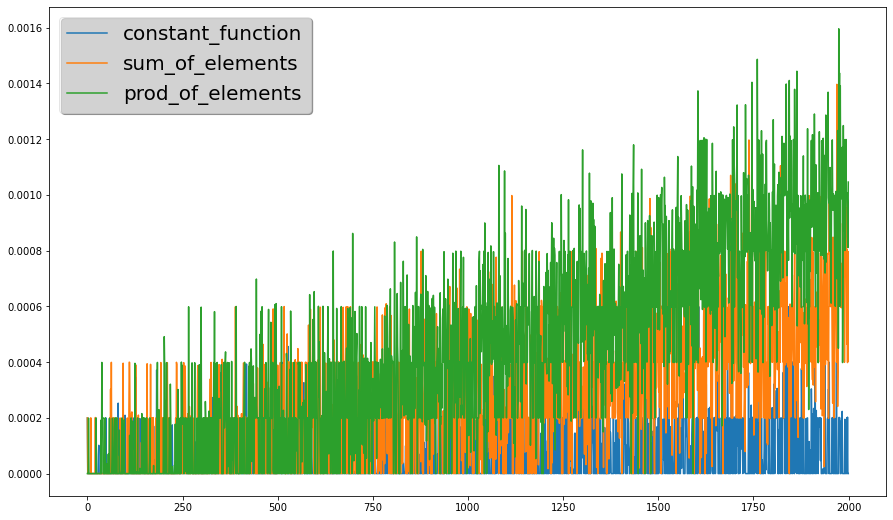

In [25]:
def plot_res(cols):
    figure = plt.figure(figsize=(15,9))
    for col in cols:
        plt.plot(avg_results[col], label=col)

    leg = plt.legend(loc='best', ncol=1, mode="left", shadow=True, fancybox=True, fontsize=20)
    leg.get_frame().set_alpha(0.5)
    plt.show()
#     plt.savefig('|'.join(cols)+'.png')
    
plot_res(['constant_function', 'sum_of_elements', 'prod_of_elements'])

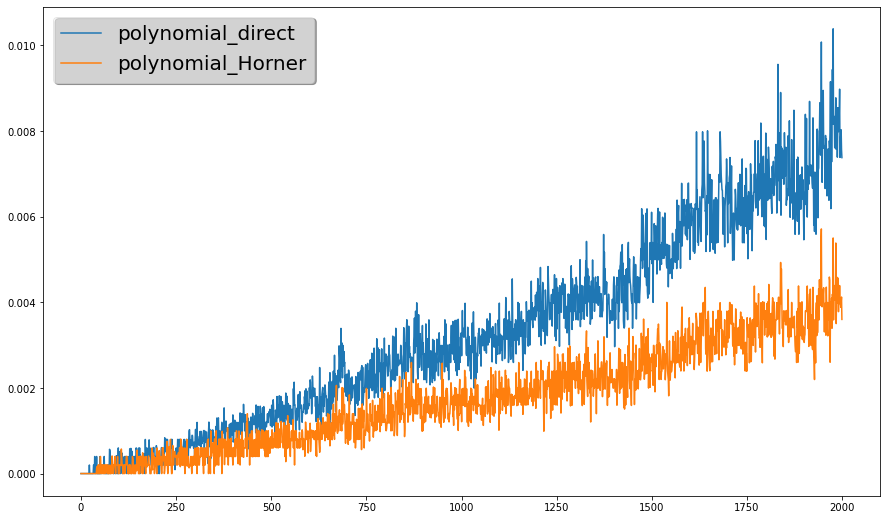

In [26]:
plot_res(['polynomial_direct', 'polynomial_Horner'])

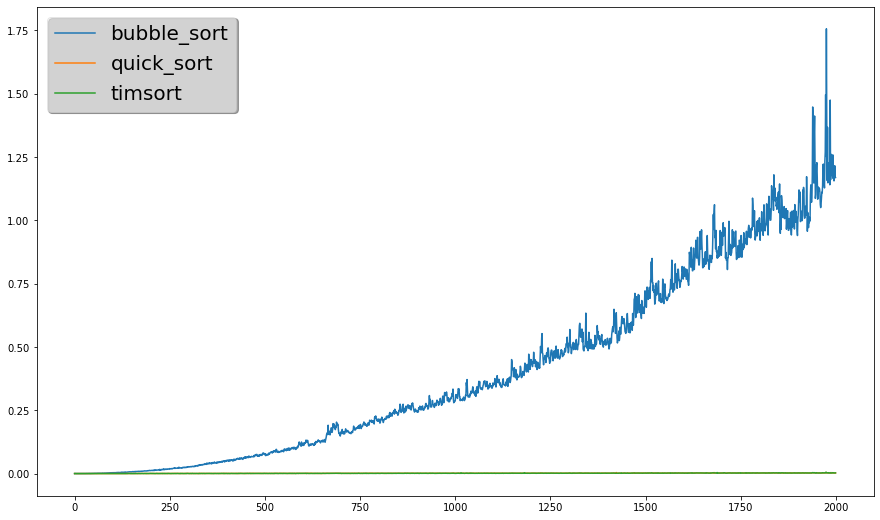

In [27]:
plot_res(['bubble_sort', 'quick_sort', 'timsort'])

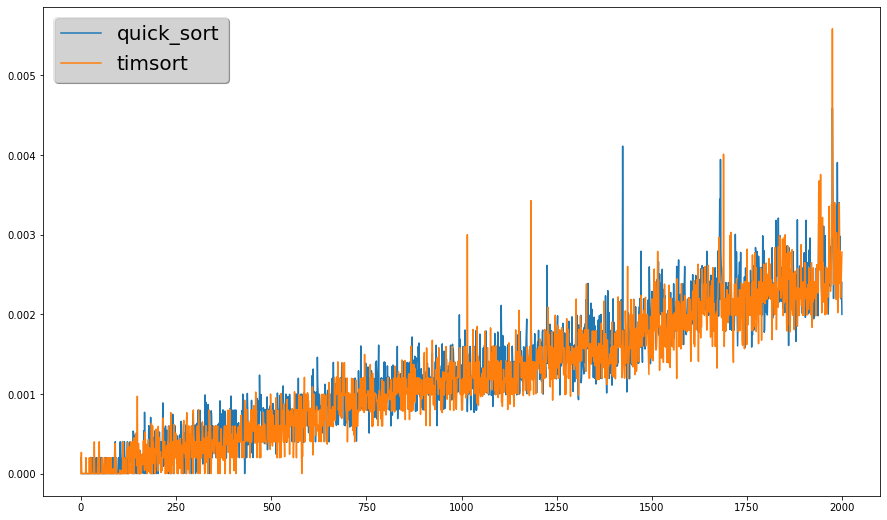

In [28]:
plot_res(['quick_sort', 'timsort'])

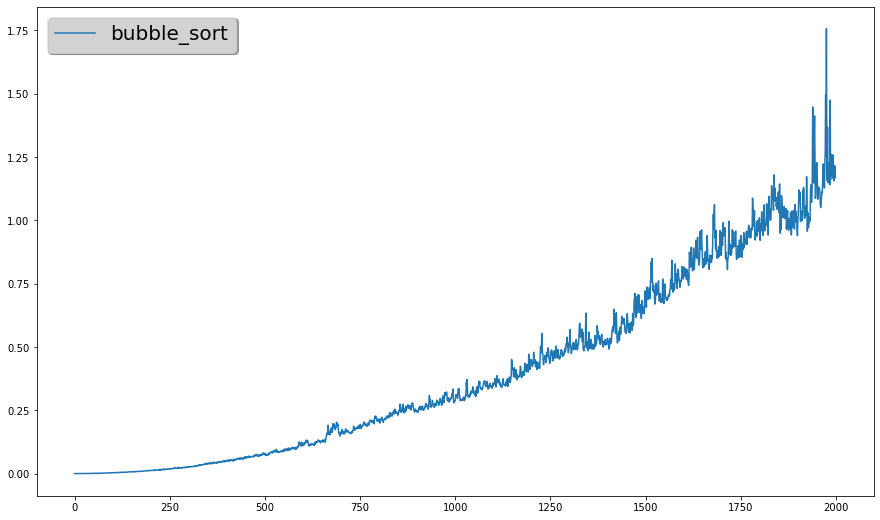

In [29]:
plot_res(['bubble_sort'])

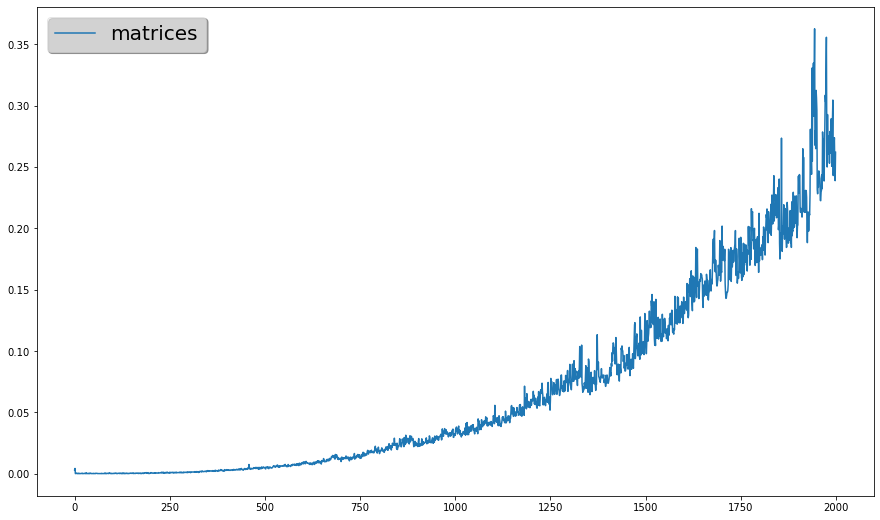

In [30]:
plot_res(['matrices'])